In [74]:
import numpy as np
import pandas as pd

#scikit-learn class that helps to take care of missing values
from sklearn.impute import SimpleImputer

# to handle outliers
from scipy.stats import zscore

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')


# for standardizing the features
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

# mutual information analysis
from sklearn.feature_selection import mutual_info_classif

# from Principal Component Analysis
from sklearn.decomposition import PCA

#### Connecting the Colab Environment to the Google Drive  account.So that we can access and manipulate files stored in a Drive directly from Colab.

In [2]:
from google.colab import drive
drive.mount('companies.csv')
# company = pd.read_csv("crunchbase/companies.csv")
# company

Mounted at companies.csv


#### Loading dataset

In [3]:
company = pd.read_csv('/content/companies.csv/MyDrive/companies.csv')

In [4]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [6]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning


#### 1. Deleting irrelevant and redundant information

In [7]:
# checking for the null values
company.isnull().sum().sort_values(ascending=False)


parent_id              196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by              41020
normalized

#### 1.a. Delete 'region','city' as they provide too much of granularity.

In [8]:
# deleting 'region', 'city', 'state_code', as they provide too much of granularity
company.drop(columns=['state_code','city','region'], inplace=True)
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [9]:
# deleting 'id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at' as they are redundant.
company.drop(columns=['id',  'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at'],inplace=True)
company.head()

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [10]:
# Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.
company.drop(columns=['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], inplace=True)

#### 1.d. Delete duplicate values if found any.

In [11]:
# check if there are any duplicates
company.duplicated().any()

True

In [12]:
# delete duplicate values if any

company.drop_duplicates(inplace=True)

In [13]:
company.duplicated().sum()

0

In [14]:
company.isnull().sum().sort_values(ascending=False)

ROI                    108738
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 1.e. Delete those which has more than 98% of null values.

In [15]:
#calculate the percentage of null values for each columns
print('percantage of null values in each column\n')
print((company.isnull().mean()*100).sort_values(ascending=False))

percantage of null values in each column

ROI                    99.336768
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
closed_at              97.607433
funding_total_usd      74.546883
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
founded_at             24.586165
country_code           22.719798
category_code          11.172623
status                  0.000000
dtype: float64


In [16]:
# dropping the columns that has more than 98% null values
company.drop('ROI', axis=1, inplace=True)

In [17]:
# Since we can see only nan values so let's check how much of ros has nan values.
company.isnull().sum().sort_values(ascending=False)

first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
last_funding_at         77992
first_funding_at        77992
funding_rounds          77793
last_milestone_at       53353
milestones              53353
first_milestone_at      53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

#### 2.a.Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
(Since these are the type of data where adding value via imputation will create wrong pattern only)

In [18]:
# Define the columns to check for missing values
columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
company.dropna(subset=columns_to_check, inplace=True)


In [19]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [20]:
# Since we can see only nan values so et's check how much of rows has nan values.
company.isnull().sum().sort_values(ascending=False)

first_investment_at    62837
last_investment_at     62837
investment_rounds      62836
closed_at              61924
funding_total_usd      43118
last_funding_at        40836
first_funding_at       40836
funding_rounds         40696
last_milestone_at      28341
milestones             28341
first_milestone_at     28341
relationships          15290
lat                     2374
lng                     2374
status                     0
country_code               0
founded_at                 0
category_code              0
dtype: int64

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

#### 2.b.1. Find the IQR

In [21]:
# For funding_total_usd
check_ftu = 'funding_total_usd'

#calculate Q1 and Q3
Q1 = company[check_ftu].quantile(0.25)
Q3 = company[check_ftu].quantile(0.75)

IQR_ftu = Q3 - Q1

In [22]:
IQR_ftu

11488962.0

In [23]:
# For funding_rounds
check_fr = 'funding_rounds'

#calculate Q1 and Q3
Q1 = company[check_fr].quantile(0.25)
Q3 = company[check_fr].quantile(0.75)

IQR_fr = Q3 - Q1

In [24]:
IQR_fr

1.0

#### 2.b.1. Find the Upper and Lower limit

In [25]:
# For funding_total_usd
lower_limit_ftu = Q1 - 1.5 * IQR_ftu
upper_limit_ftu = Q3 + 1.5 * IQR_ftu

print(f"Lower Limit for {check_ftu}: {lower_limit_ftu }")
print(f"Upper Limit for {check_ftu}: {upper_limit_ftu}")

Lower Limit for funding_total_usd: -17233442.0
Upper Limit for funding_total_usd: 17233445.0


In [26]:
# For funding_rounds
lower_limit_fr = Q1 - 1.5 * IQR_fr
upper_limit_fr = Q3 + 1.5 * IQR_fr

print(f"Lower Limit for {check_fr}: {lower_limit_fr }")
print(f"Upper Limit for {check_fr}: {upper_limit_fr}")

Lower Limit for funding_rounds: -0.5
Upper Limit for funding_rounds: 3.5


#### 2.b.1.  Find outliers

In [27]:
# For funding_total_usd
outliers_ftu = company[(company[check_ftu]< lower_limit_ftu)| (company[check_ftu]> upper_limit_ftu)]
outliers_ftu

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
19,health,operating,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-10-10,2013-08-13,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
24,analytics,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2013-03-28,3.0,33000000.0,2010-05-18,2013-03-01,3.0,19.0,37.774929,-122.419415
66,mobile,acquired,2005-01-01,NaN,USA,NaN,NaN,NaN,2005-03-01,2012-07-02,7.0,121500000.0,2012-01-19,2013-08-13,3.0,45.0,42.360082,-71.058880
80,games_video,operating,2003-04-01,NaN,USA,NaN,NaN,NaN,2006-08-28,2012-01-01,3.0,95097200.0,2009-11-12,2013-01-01,3.0,28.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196300,security,ipo,1995-03-01,NaN,USA,2008-08-19,2009-11-18,2.0,2009-07-06,2010-11-22,2.0,27400000.0,2010-07-09,2013-10-31,3.0,67.0,38.984652,-77.094709
196360,security,operating,2003-03-01,NaN,USA,NaN,NaN,NaN,2003-01-01,2013-09-10,7.0,28200000.0,2011-03-21,2012-01-01,3.0,20.0,38.984652,-77.094709
196415,security,operating,1997-01-01,NaN,USA,2010-12-08,2010-12-08,1.0,2005-02-07,2005-02-07,1.0,108000000.0,2011-07-01,2013-02-21,3.0,17.0,39.920541,-105.086650
196496,games_video,acquired,2004-01-01,NaN,CHN,NaN,NaN,NaN,2005-01-01,2011-02-04,4.0,286500000.0,2009-05-01,2011-02-04,2.0,3.0,31.230390,121.473702


In [28]:
# For funding_rounds
# outliers_fr = company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)]
# outliers_fr

#### 2.b.1. Drop the outliers

In [29]:
# For funding_total_usd
company.drop(outliers_ftu.index, inplace=True)

In [30]:
# For funding_rounds

# company.drop(outliers_fr.index, inplace=True)
# company.drop(index=outliers_fr, inplace=True)
company.drop(company[(company['funding_rounds']< lower_limit_fr)| (company['funding_rounds']> upper_limit_fr)].index, inplace=True)

In [31]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01,2008-01-01,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [32]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  object 
 3   closed_at            1496 non-null   object 
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     18018 non-null  object 
 9   last_funding_at      18018 non-null  object 
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   31636 non-null  object 
 13  last_milestone_at    31636 non-null  object 
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [33]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

In [34]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  object 
 3   closed_at            1496 non-null   object 
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     18018 non-null  object 
 9   last_funding_at      18018 non-null  object 
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   31636 non-null  object 
 13  last_milestone_at    31636 non-null  object 
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [35]:
# founded_at
company['founded_at'] = company['founded_at'].fillna('2021')
company['founded_at'] = company['founded_at'].str[0:4].astype(int)

# closed_at
company['closed_at'] = company['closed_at'].fillna('2021')
company['closed_at'] = company['closed_at'].str[0:4].astype(int)

# first_funding_at
company['first_funding_at'] = company['first_funding_at'].fillna('2021')
company['first_funding_at'] = company['first_funding_at'].str[0:4].astype(int)

# last_funding_at
company['last_funding_at'] = company['last_funding_at'].fillna('2021')
company['last_funding_at'] = company['last_funding_at'].str[0:4].astype(int)

# first_milestone_at
company['first_milestone_at'] = company['first_milestone_at'].fillna('2021')
company['first_milestone_at'] = company['first_milestone_at'].str[0:4].astype(int)

# last_milestone_at
company['last_milestone_at'] = company['last_milestone_at'].fillna('2021')
company['last_milestone_at'] = company['last_milestone_at'].str[0:4].astype(int)

In [36]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,2021,MAR,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2013,2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2012,2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,1.0,34.052234,-118.243685


#### 1.b. Generalize the categoricaldata i.e. category_code and  country_code

In [37]:
# 1. category_code
print(company['category_code'].nunique())
print(company['country_code'].nunique())

42
165


In [38]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.
column_name = 'category_code'
value_counts = company[column_name].value_counts()

In [39]:
value_counts

software            10715
web                  7697
ecommerce            4786
other                4688
mobile               3629
advertising          3525
consulting           2767
games_video          2745
enterprise           2388
biotech              1851
public_relations     1538
hardware             1384
network_hosting      1231
education            1135
search                964
cleantech             737
social                639
finance               622
analytics             612
security              591
health                584
legal                 360
medical               324
travel                322
semiconductor         319
news                  275
manufacturing         263
fashion               261
hospitality           258
real_estate           219
local                 195
photo_video           194
messaging             177
music                 176
sports                163
transportation        123
nonprofit             112
design                105
automotive  

In [40]:
top_10_values_category = value_counts.head(10)
top_10_values_category

software       10715
web             7697
ecommerce       4786
other           4688
mobile          3629
advertising     3525
consulting      2767
games_video     2745
enterprise      2388
biotech         1851
Name: category_code, dtype: int64

In [41]:
# remaining categories
Other_values = company[~company[column_name].isin(top_10_values_category.index)][column_name]

# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values.index,column_name] = "Other"
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,2021,MAR,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964


In [42]:
# Let's check if we've more than 15 columns
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   closed_at            58854 non-null  int64  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int64  
 9   last_funding_at      58854 non-null  int64  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int64  
 13  last_milestone_at    58854 non-null  int64  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [43]:
# # One-hot encoding to category_code
# company_OHE = pd.get_dummies(company['category_code'], prefix= 'category_code')

# # Concatenate category with company dataset
# company = pd.concat([company, company_OHE], axis=1)

# # Since, We've added the encoded category_columns, let's delete original category_code
# company.drop(columns=['category_code'],inplace=True)

### Let's encode 'country' column now.

In [44]:
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.
col_name = 'country_code'
value_counts_country = company[col_name].value_counts()


In [45]:
# top 10 values
top_10_values_country = value_counts_country.head(10)
top_10_values_country

USA    32986
GBR     4905
IND     2960
CAN     2579
DEU     1342
FRA     1200
AUS     1023
ESP      876
ISR      739
NLD      648
Name: country_code, dtype: int64

In [46]:
# remaining country_code
Other_values_country = company[~company[col_name].isin(top_10_values_country.index)][col_name]

# Lets keep the country as same of it falls under above 10 otherwise let's replace it with other.
company.loc[Other_values_country.index,col_name] = "Other"
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2013,2013,2.0,5.0,37.774929,-122.419415
196549,Other,operating,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2012,2013,3.0,44.0,38.882334,-77.171091
196551,Other,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,1.0,34.052234,-118.243685


In [47]:
# # One-hot encoding to country_code
# company_OHE_country = pd.get_dummies(company['country_code'], prefix='country_code')

# # Concatenate country with company dataset
# company = pd.concat([company, company_OHE_country], axis=1)

# # Since, We've added the encoded country_columns, let's delete original country_code
# company.drop(columns=['country_code'],inplace=True)

In [48]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   closed_at            58854 non-null  int64  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int64  
 9   last_funding_at      58854 non-null  int64  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int64  
 13  last_milestone_at    58854 non-null  int64  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

### 2. Create new variables¶


    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.

```
- if the value in status is 'operating' or 'ipo', Let's put 1.
- Where as if the value is 'acquired' or 'closed', let's put 0.
```



In [49]:
# new column isClosed
company['isClosed'] = ((company['status'] != 'operating') & (company['status'] != 'ipo')).astype(int)
company.head()



,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,2021,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0
6,Other,operating,2008,2021,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0
12,advertising,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
15,games_video,operating,2008,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

#### 2.b.i Replacing the values in closed_at column
- if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
- Where as if the value is 'acquired' or 'closed', let's put 0.

In [50]:
company['closed_at'] = np.where(company['status'].str.contains('operating|ipo', case=False, na=False), 0, company['closed_at'].fillna(2021))


In [51]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
5,advertising,operating,2007,0,Other,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,2.0,30.427755,-9.598107,0
6,Other,operating,2008,0,IND,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,NaN,22.307159,73.181219,0
12,advertising,operating,2008,0,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,2.0,35.686975,-105.937799,0
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
15,games_video,operating,2008,0,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2008,2008,1.0,3.0,33.078655,-116.601964,0


2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [52]:
company['active_days'] = (company['closed_at'] - company['founded_at'])*365

In [53]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58854 entries, 5 to 196552
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        58854 non-null  object 
 1   status               58854 non-null  object 
 2   founded_at           58854 non-null  int64  
 3   closed_at            58854 non-null  int64  
 4   country_code         58854 non-null  object 
 5   first_investment_at  644 non-null    object 
 6   last_investment_at   644 non-null    object 
 7   investment_rounds    645 non-null    float64
 8   first_funding_at     58854 non-null  int64  
 9   last_funding_at      58854 non-null  int64  
 10  funding_rounds       18158 non-null  float64
 11  funding_total_usd    15747 non-null  float64
 12  first_milestone_at   58854 non-null  int64  
 13  last_milestone_at    58854 non-null  int64  
 14  milestones           31636 non-null  float64
 15  relationships        43854 non-null

In [54]:
company= company[company['active_days'] >= 0]

In [55]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 13 to 196541
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        4750 non-null   object 
 1   status               4750 non-null   object 
 2   founded_at           4750 non-null   int64  
 3   closed_at            4750 non-null   int64  
 4   country_code         4750 non-null   object 
 5   first_investment_at  65 non-null     object 
 6   last_investment_at   65 non-null     object 
 7   investment_rounds    66 non-null     float64
 8   first_funding_at     4750 non-null   int64  
 9   last_funding_at      4750 non-null   int64  
 10  funding_rounds       2517 non-null   float64
 11  funding_total_usd    2146 non-null   float64
 12  first_milestone_at   4750 non-null   int64  
 13  last_milestone_at    4750 non-null   int64  
 14  milestones           2881 non-null   float64
 15  relationships        3852 non-null 

In [56]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
13,web,acquired,2007,2021,USA,NaN,NaN,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1,5110
18,mobile,acquired,2008,2021,USA,NaN,NaN,NaN,2008,2008,1.0,NaN,1995,2012,4.0,9.0,37.441883,-122.143019,1,4745
63,Other,acquired,1986,2021,USA,NaN,NaN,NaN,2021,2021,NaN,NaN,2021,2021,NaN,1.0,41.325376,-72.193134,1,12775
72,web,closed,2006,2010,USA,NaN,NaN,NaN,2008,2008,1.0,NaN,2021,2021,NaN,5.0,NaN,NaN,1,1460
120,web,closed,2007,2012,USA,NaN,NaN,NaN,2007,2007,1.0,100000.0,2009,2009,1.0,1.0,37.386052,-122.083851,1,1825


In [57]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 13 to 196541
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        4750 non-null   object 
 1   status               4750 non-null   object 
 2   founded_at           4750 non-null   int64  
 3   closed_at            4750 non-null   int64  
 4   country_code         4750 non-null   object 
 5   first_investment_at  65 non-null     object 
 6   last_investment_at   65 non-null     object 
 7   investment_rounds    66 non-null     float64
 8   first_funding_at     4750 non-null   int64  
 9   last_funding_at      4750 non-null   int64  
 10  funding_rounds       2517 non-null   float64
 11  funding_total_usd    2146 non-null   float64
 12  first_milestone_at   4750 non-null   int64  
 13  last_milestone_at    4750 non-null   int64  
 14  milestones           2881 non-null   float64
 15  relationships        3852 non-null 

#### 2.b.iii. Then, delete the closed_at column.

In [58]:
company.drop('closed_at', inplace=True, axis=1)

### Let's work on target variabe now.

### Remove the null vaues with the mean value in 'Numerical Data'

In [59]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 13 to 196541
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        4750 non-null   object 
 1   status               4750 non-null   object 
 2   founded_at           4750 non-null   int64  
 3   country_code         4750 non-null   object 
 4   first_investment_at  65 non-null     object 
 5   last_investment_at   65 non-null     object 
 6   investment_rounds    66 non-null     float64
 7   first_funding_at     4750 non-null   int64  
 8   last_funding_at      4750 non-null   int64  
 9   funding_rounds       2517 non-null   float64
 10  funding_total_usd    2146 non-null   float64
 11  first_milestone_at   4750 non-null   int64  
 12  last_milestone_at    4750 non-null   int64  
 13  milestones           2881 non-null   float64
 14  relationships        3852 non-null   float64
 15  lat                  4591 non-null 

In [60]:
# Imputing Numerical columns using mean
company['funding_rounds'].fillna(company['funding_rounds'].mean(), inplace=True)
company['funding_total_usd'].fillna(company['funding_total_usd'].mean(), inplace=True)
company['investment_rounds'].fillna(company['investment_rounds'].mean(), inplace=True)
company['milestones'].fillna(company['milestones'].mean(), inplace=True)
company['relationships'].fillna(company['relationships'].mean(), inplace=True)
company['lat'].fillna(company['lat'].mean(), inplace=True)
company['lng'].fillna(company['lng'].mean(), inplace=True)

In [61]:
company['first_investment_at'].fillna(company['first_investment_at'].mode().iloc[0], inplace=True)
company['last_investment_at'].fillna(company['last_investment_at'].mode().iloc[0], inplace=True)



In [62]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 13 to 196541
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_code        4750 non-null   object 
 1   status               4750 non-null   object 
 2   founded_at           4750 non-null   int64  
 3   country_code         4750 non-null   object 
 4   first_investment_at  4750 non-null   object 
 5   last_investment_at   4750 non-null   object 
 6   investment_rounds    4750 non-null   float64
 7   first_funding_at     4750 non-null   int64  
 8   last_funding_at      4750 non-null   int64  
 9   funding_rounds       4750 non-null   float64
 10  funding_total_usd    4750 non-null   float64
 11  first_milestone_at   4750 non-null   int64  
 12  last_milestone_at    4750 non-null   int64  
 13  milestones           4750 non-null   float64
 14  relationships        4750 non-null   float64
 15  lat                  4750 non-null 

In [63]:
# Saving the csv file
company.to_csv('cleaned_companies.csv', index=False)

## Exploratory Data Analysis (EDA)

#### Univariate Analysis

<Axes: xlabel='founded_at', ylabel='Count'>

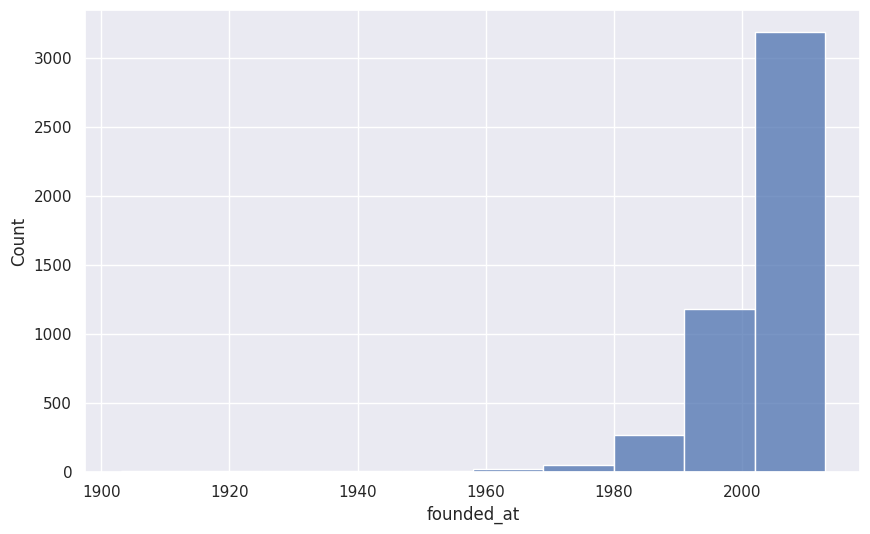

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(company.founded_at, bins = 10)


<Axes: xlabel='active_days', ylabel='Count'>

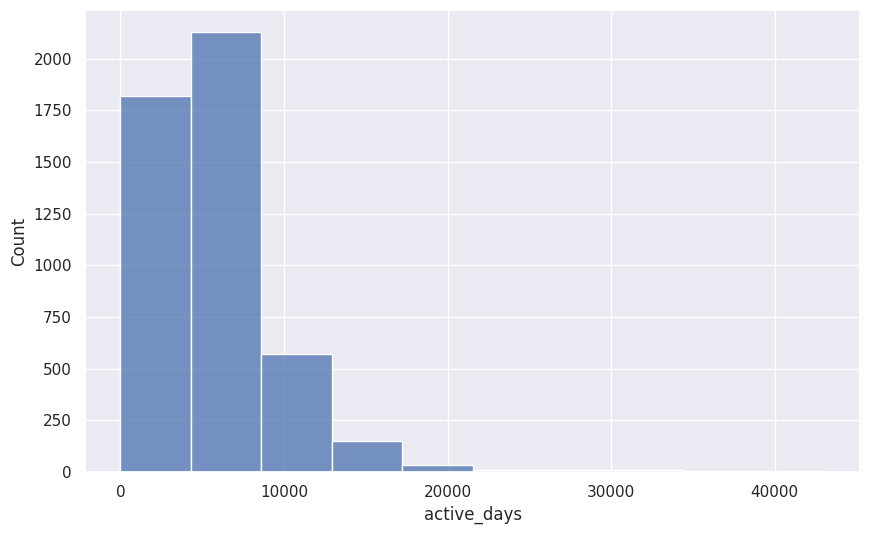

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(company.active_days, bins = 10)

<Axes: xlabel='first_milestone_at', ylabel='Count'>

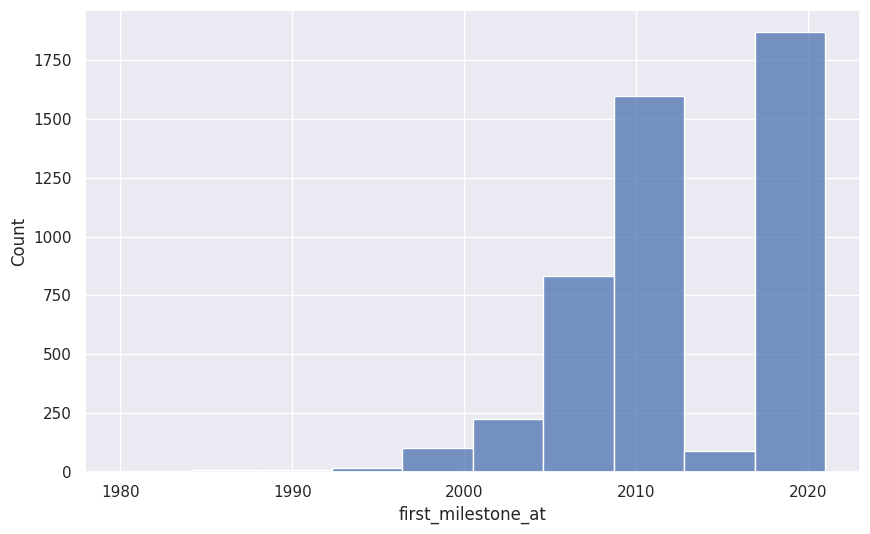

In [66]:
plt.figure(figsize=(10,6))
sns.histplot(company.first_milestone_at, bins = 10)


<Axes: xlabel='last_milestone_at', ylabel='Count'>

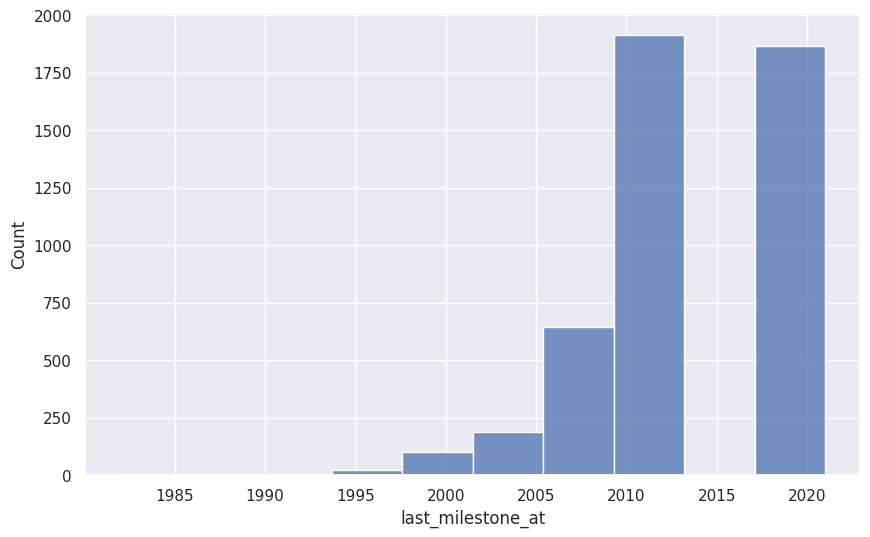

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(company.last_milestone_at, bins = 10)

#### Bivariate Analysis

Text(0, 0.5, 'count')

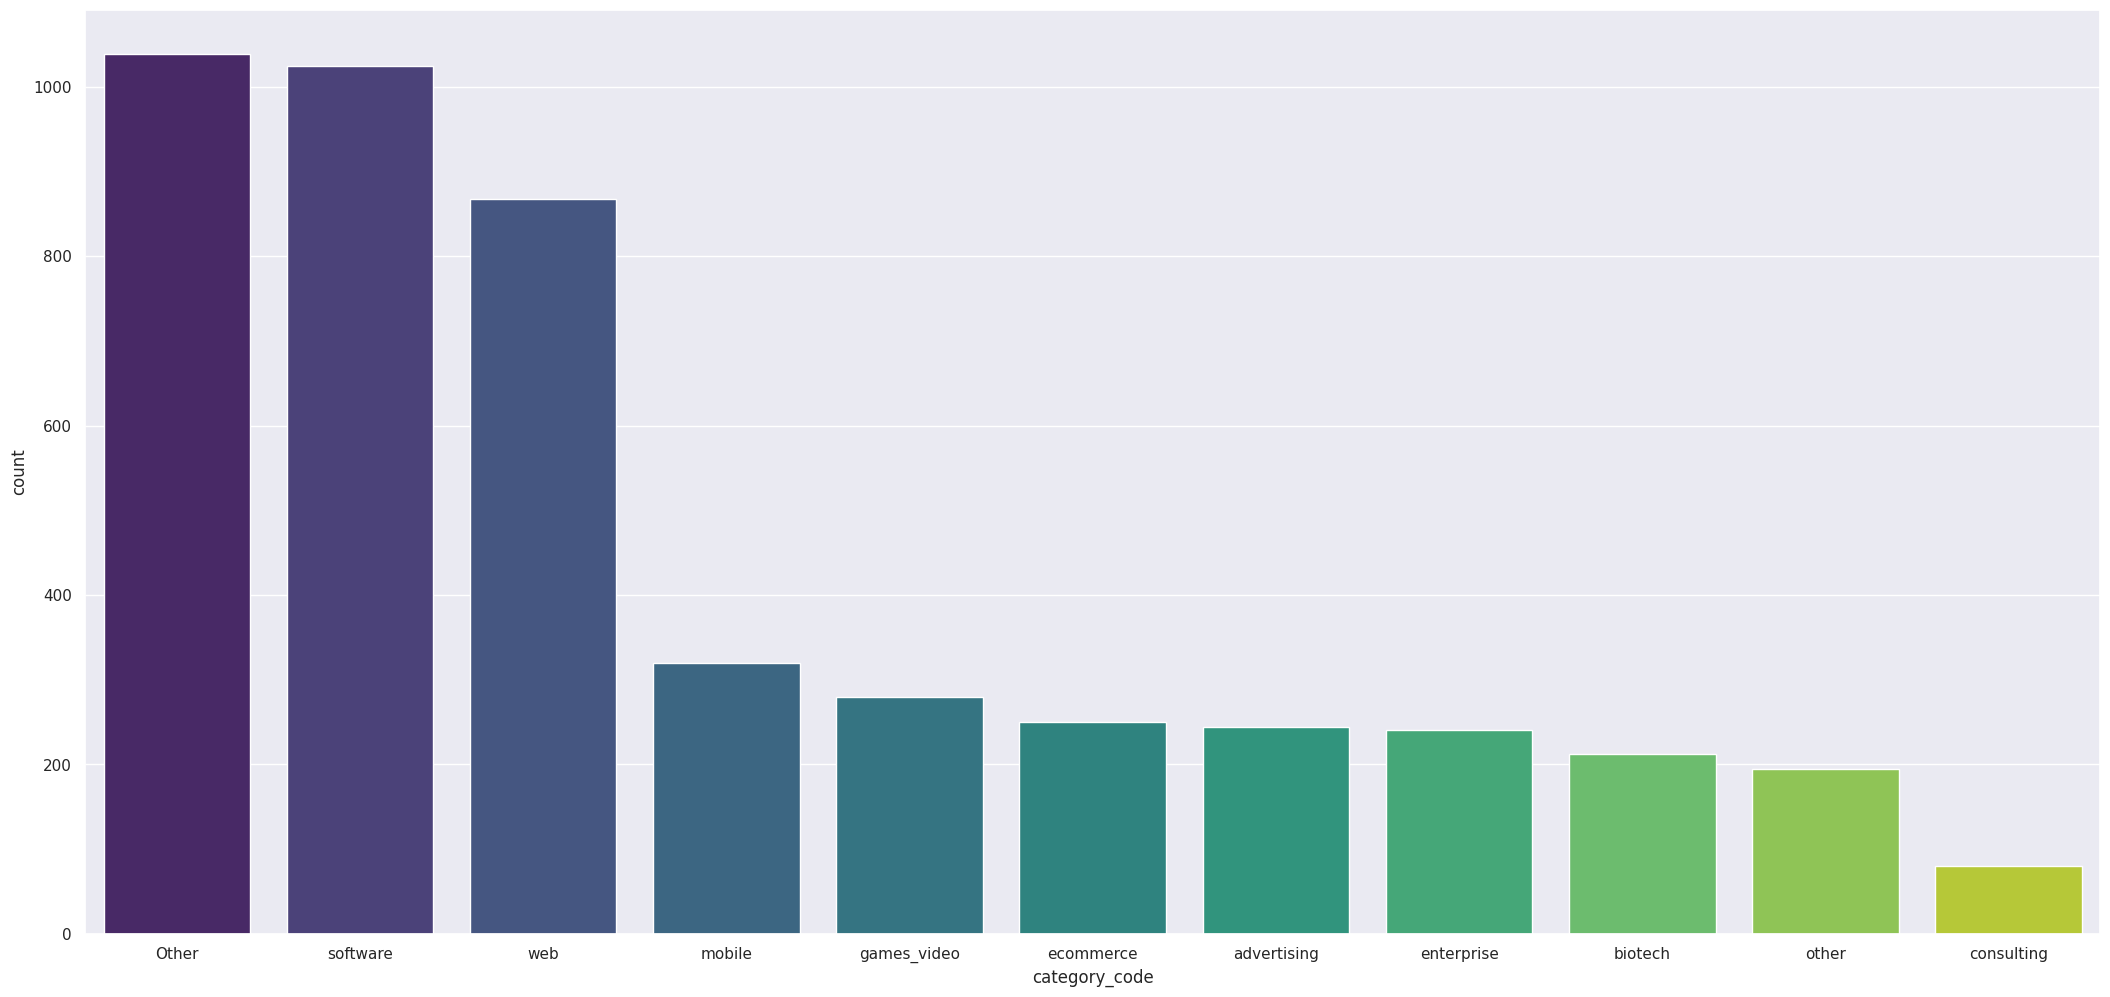

In [68]:
# for categorical datas
# Bar graph
plt.figure(figsize=(26,12))
sns.countplot(x='category_code', data=company, order= company.category_code.value_counts().index, palette='viridis')
plt.xlabel('category_code')
plt.ylabel('count')

Text(0, 0.5, 'count')

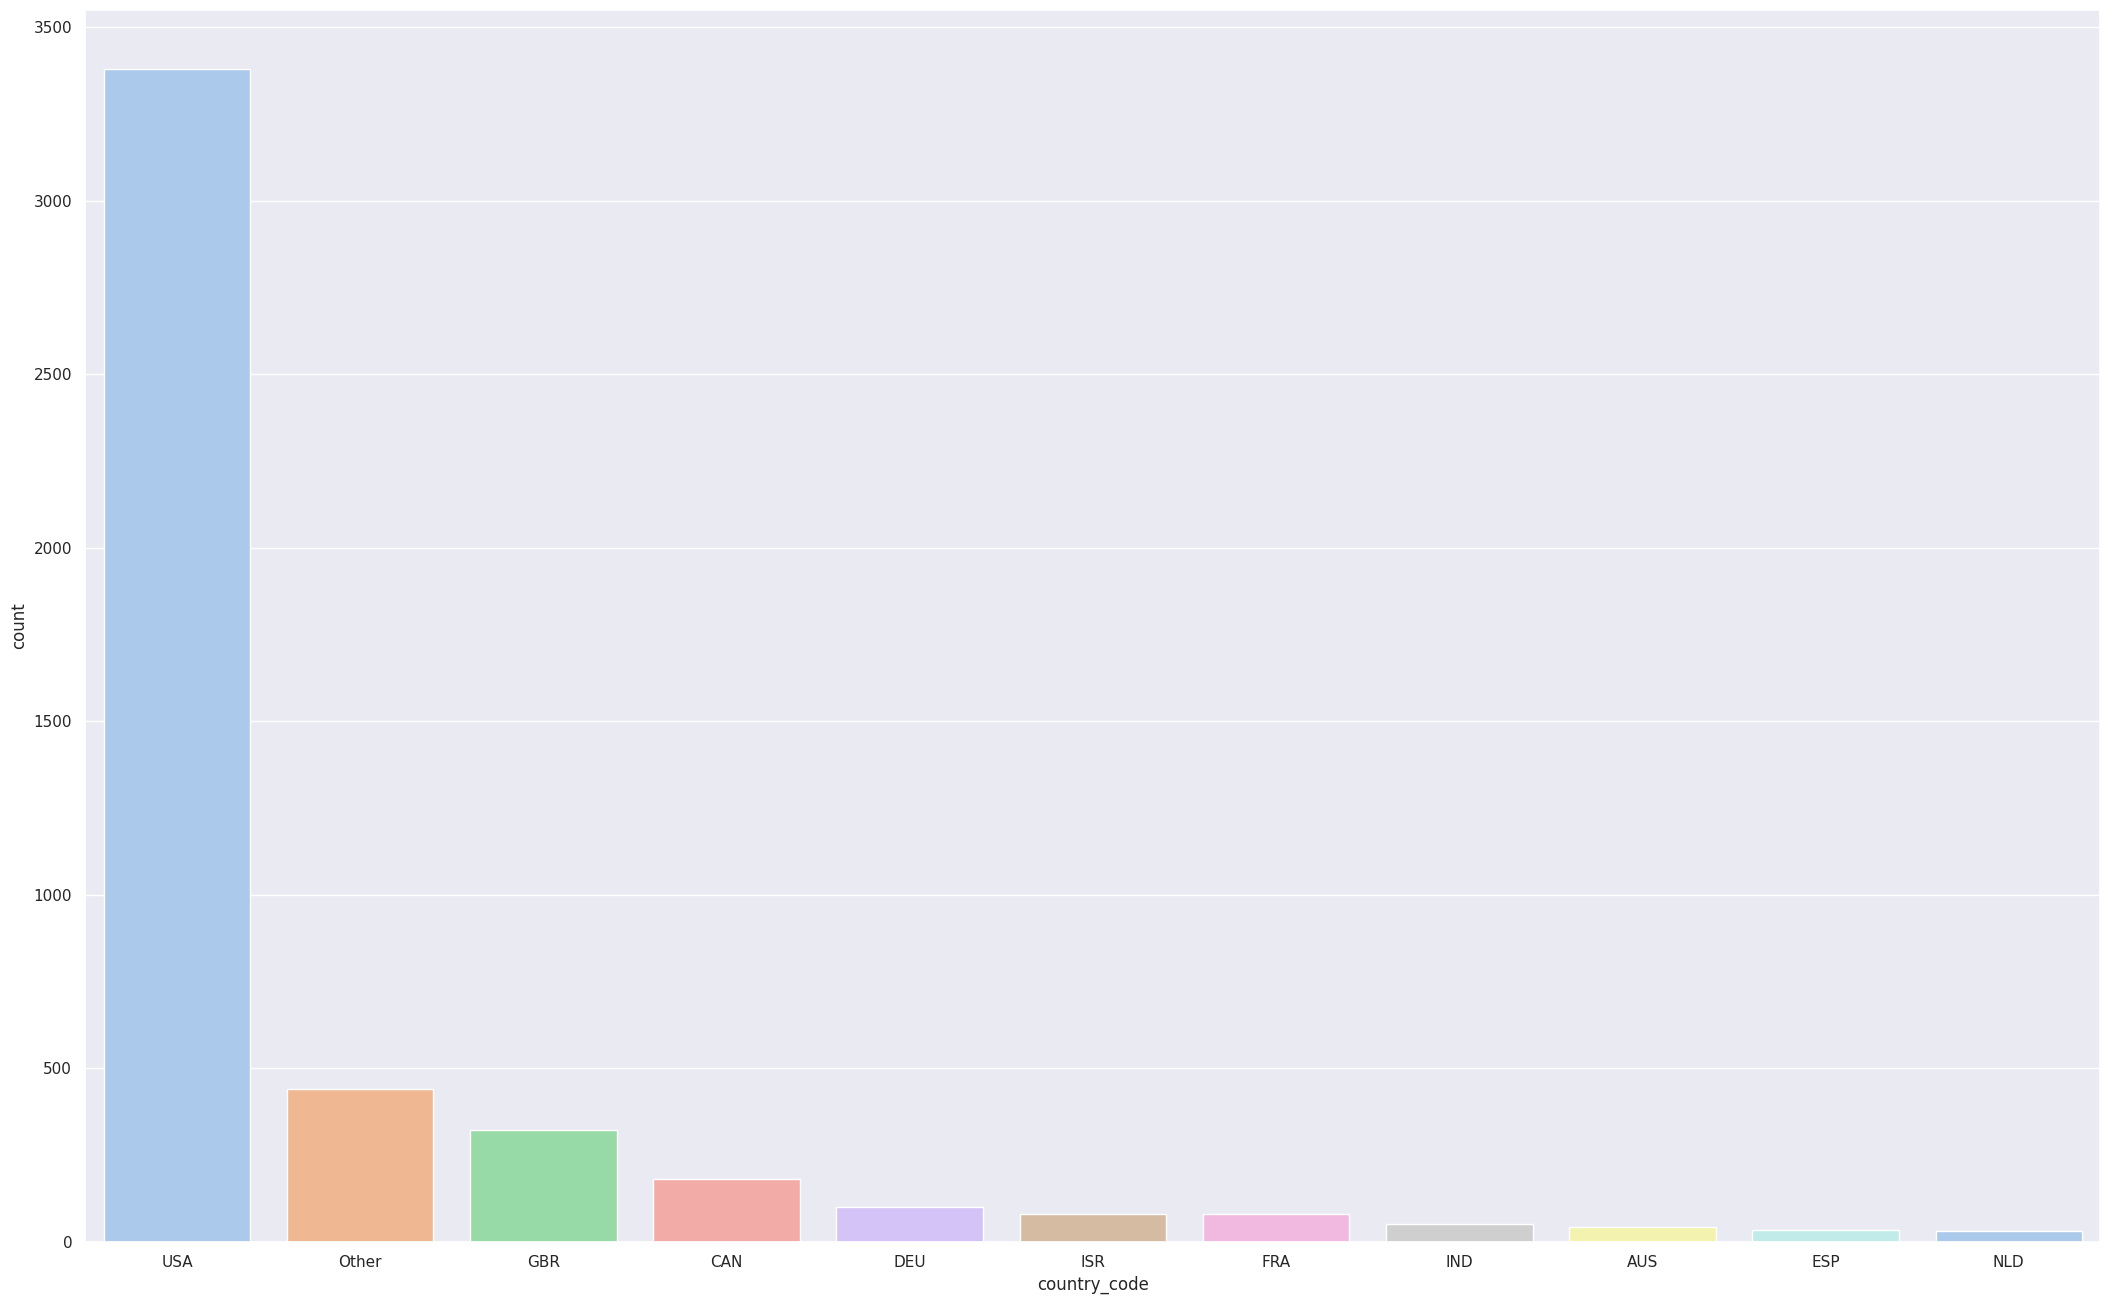

In [69]:
plt.figure(figsize=(26,16))
sns.countplot(x='country_code', data=company, order= company.country_code.value_counts().index, palette='pastel')
plt.xlabel('country_code')
plt.ylabel('count')

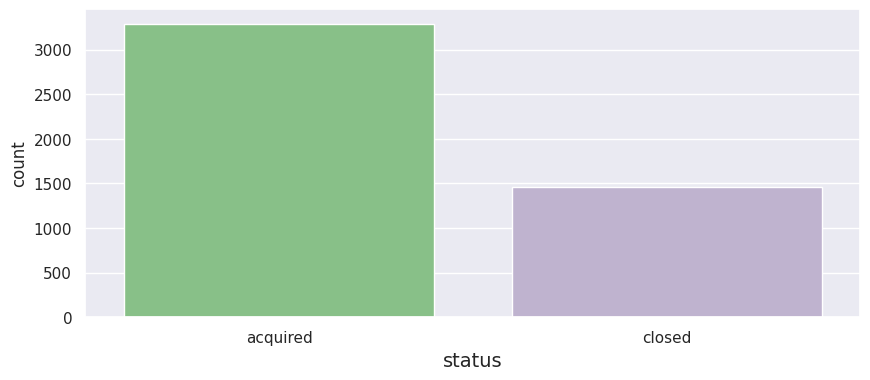

In [70]:
plt.figure(figsize=(10,4))
sns.countplot(x='status' , data=company, palette='Accent')
plt.xlabel('status', fontsize=14)
plt.show()

<Figure size 1500x1500 with 0 Axes>

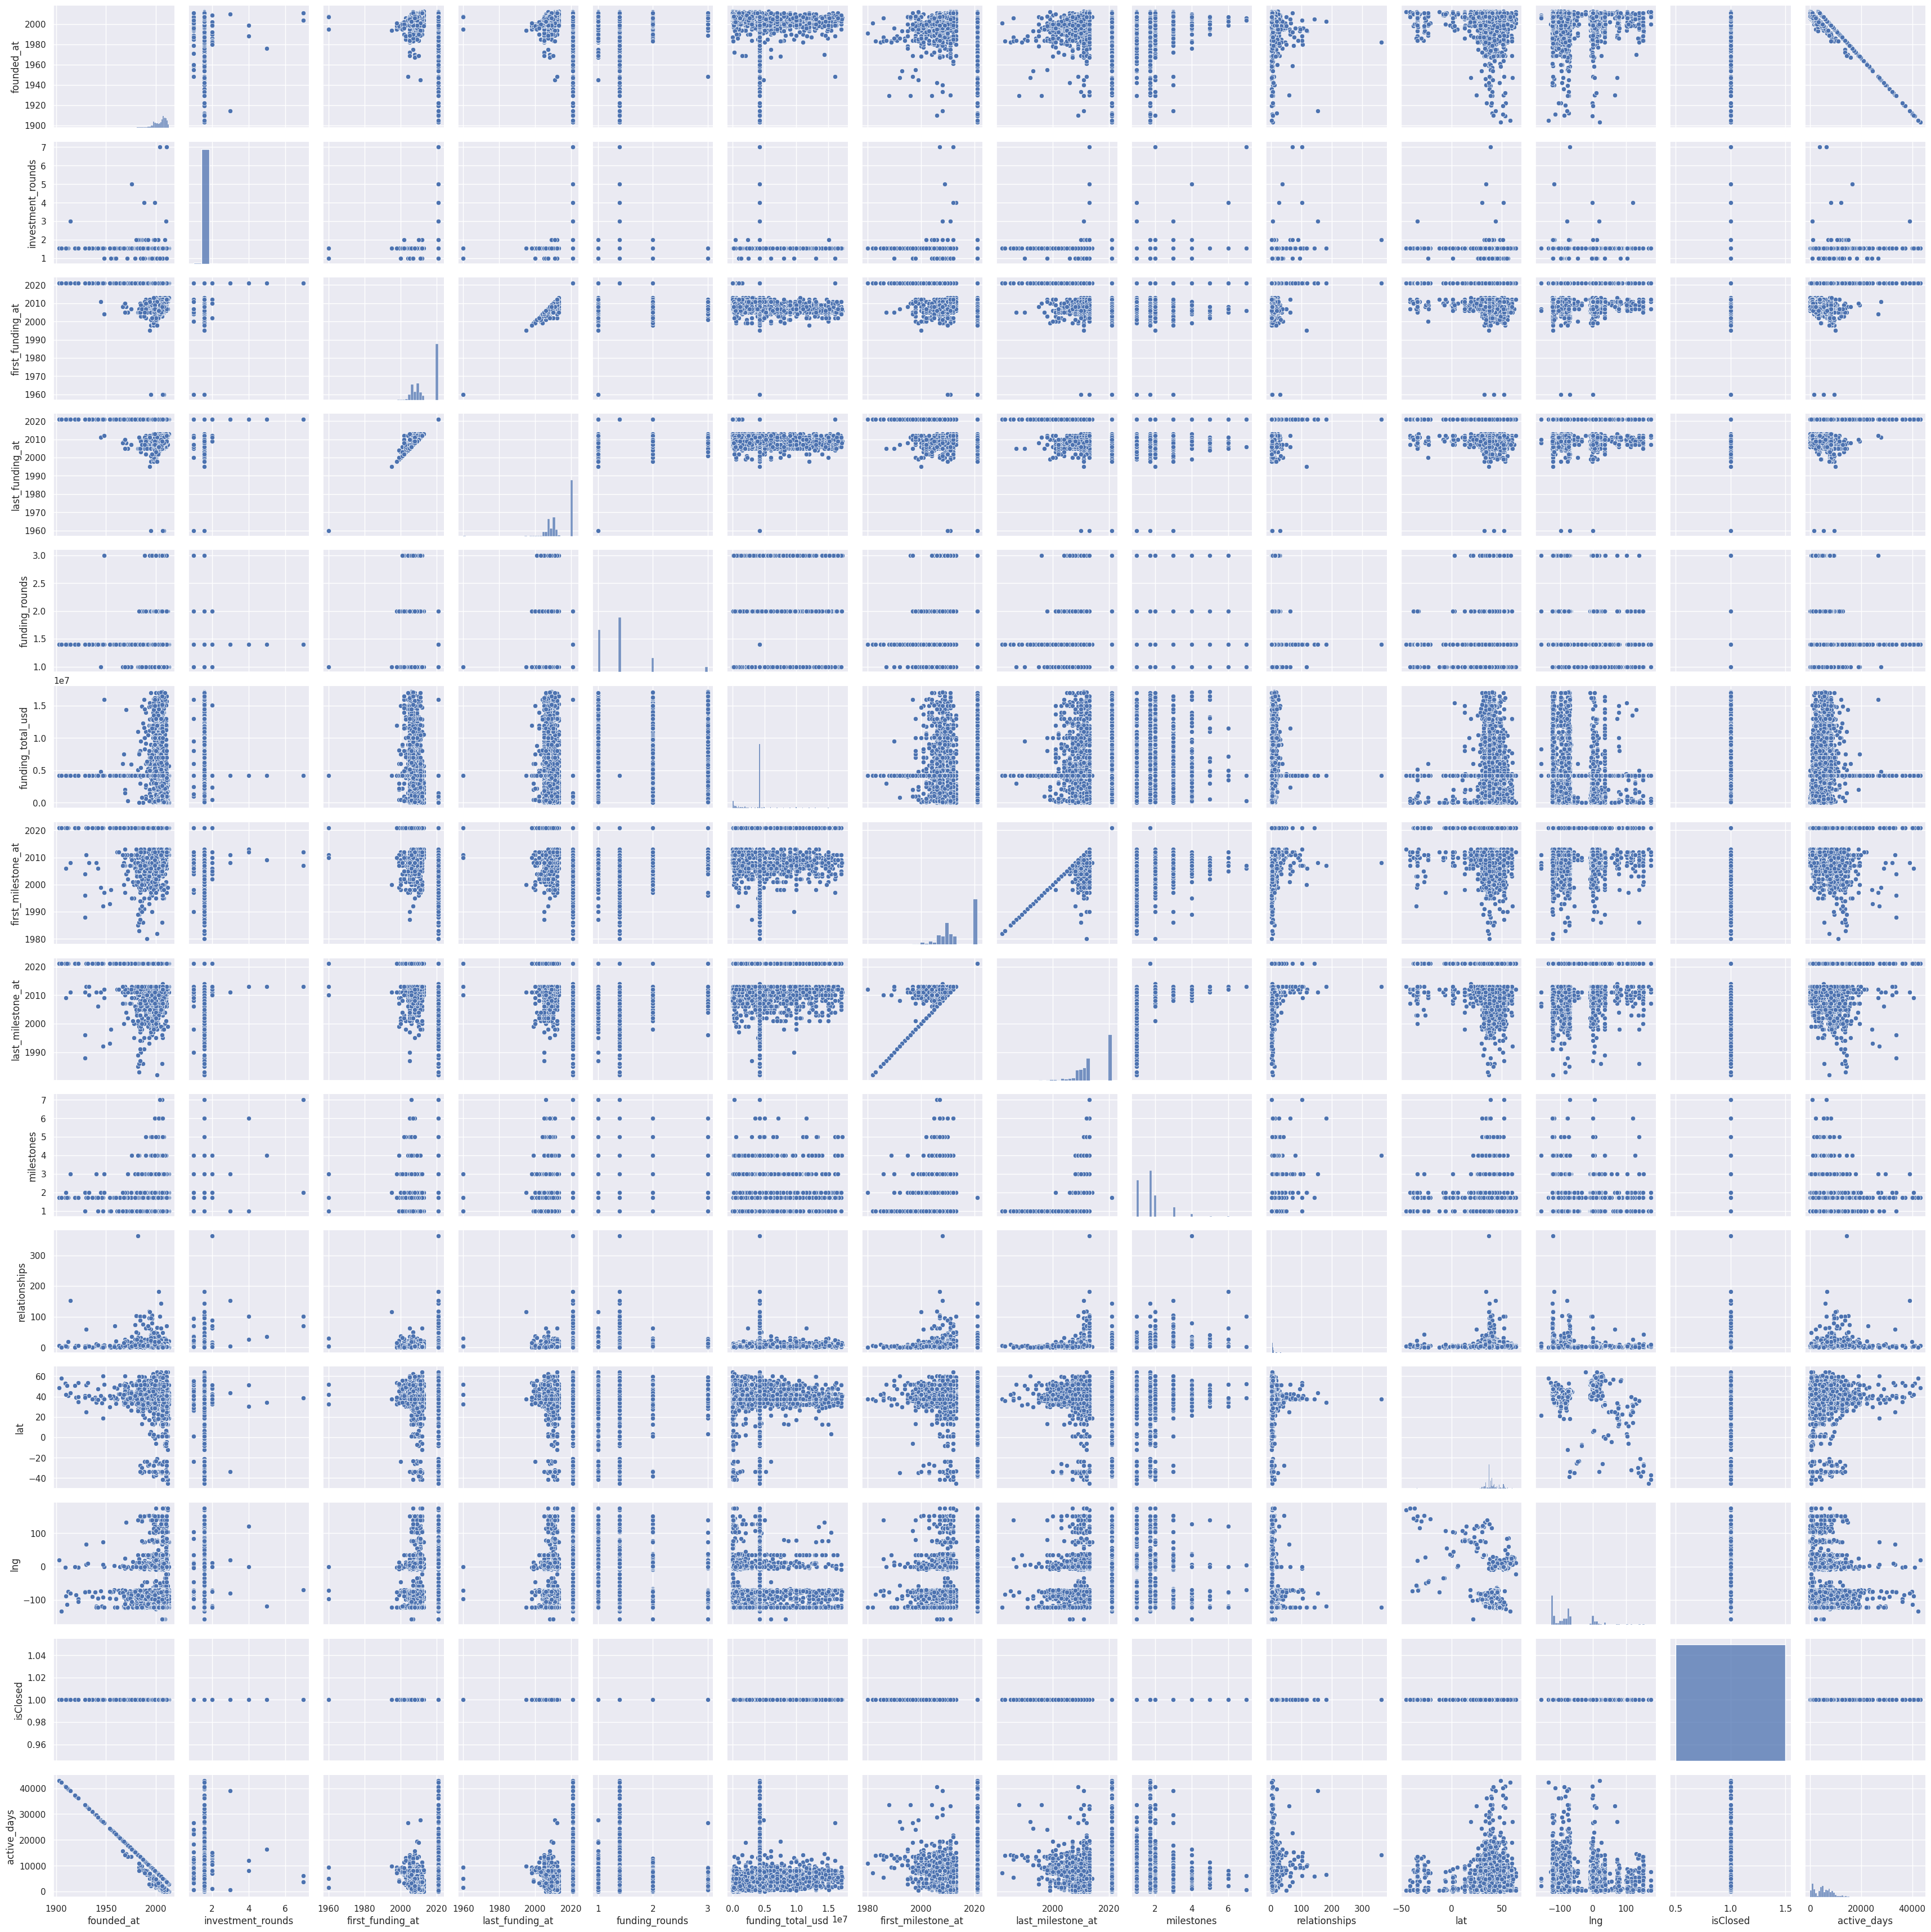

In [71]:
# pairplot to show the relation of each feature with every other feature
plt.figure(figsize=(15,15))
sns.pairplot(company)

#### Multivariate Analysis

#### Correlation Matrix

In [72]:
company['isClosed'].value_counts()

1    4750
Name: isClosed, dtype: int64

<Axes: >

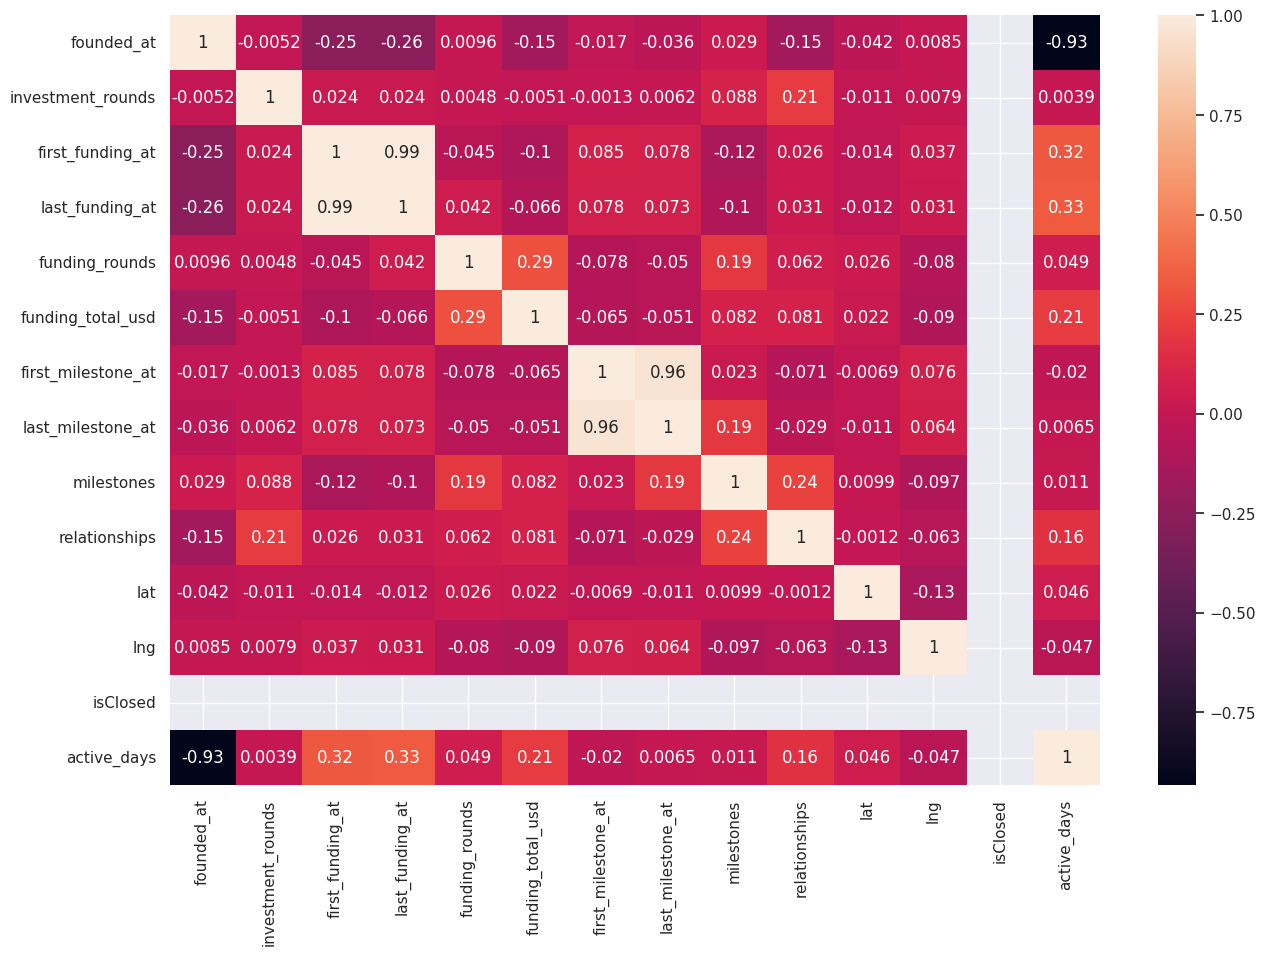

In [73]:
plt.figure(figsize=(15, 10))
sns.heatmap(company.corr(), annot=True)

#### Mutual Information Analysis

In [84]:
X = company.copy()
y = X.pop("status")

#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

# label encoding for target variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [76]:
# for real valued target
from sklearn.feature_selection import mutual_info_regression

In [85]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y_encoded, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y_encoded, discrete_features)
mi_scores[::3]

active_days           0.497263
first_funding_at      0.100781
relationships         0.038282
lng                   0.025483
country_code          0.002475
last_investment_at    0.000000
Name: MI Scores, dtype: float64

This indicates that the active_days has relatively high MI score which means it has a strong relation with the target variable.It suggests that changes in the "active_days" feature are informative about changes in the target variable.
Similarly, 'last_investment_at' feature does not provide information about the target variable.

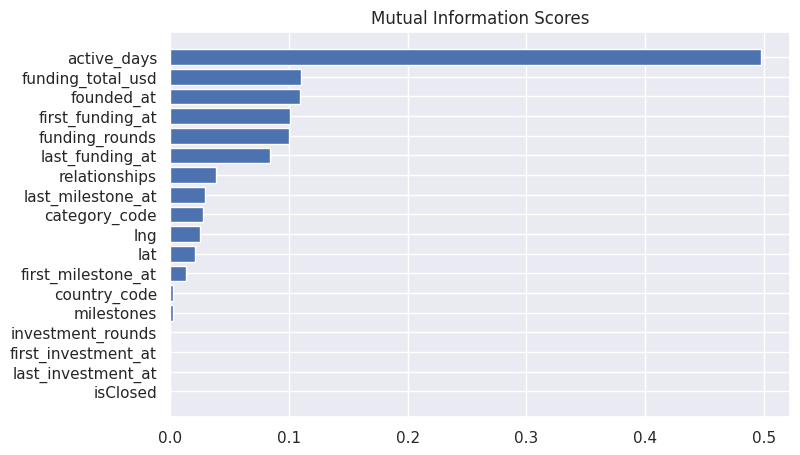

In [86]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

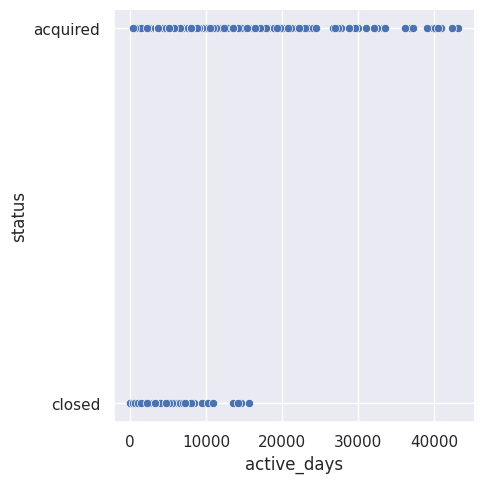

In [87]:
sns.relplot(x="active_days", y="status", data=company);

## Principal Component Analysis

Select the features that has comparatively high MI scores so that this approach might result in a more interpretable and potentially more predictive model.

In [104]:
selected_features = ['active_days', 'funding_total_usd','founded_at', 'first_funding_at', 'funding_rounds']

X = X.loc[:, selected_features]


In [106]:
X

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [107]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.656829,-0.009132,1.127078,0.325718,-0.297050
1,-0.825849,-0.171332,1.052010,0.179345,-0.319556
2,2.458759,-0.496373,-0.135361,-0.185049,0.044440
3,-1.189420,-0.169953,0.995126,0.242357,0.351311
4,-1.506365,-0.997799,0.887554,-0.752182,0.144843


In [144]:
# Define the plot_variance function
def plot_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(12, 6))
#Explained Variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='green', alpha=0.7)
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)


    plt.subplots_adjust(wspace=5)
    plt.tight_layout()


In [145]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
active_days,0.664234,-0.018658,0.140076,-0.144734,-0.719636
funding_total_usd,0.194509,0.663049,0.156222,0.703923,0.051179
founded_at,-0.646082,0.062426,-0.235436,0.222029,-0.688443
first_funding_at,0.315873,-0.367385,-0.762668,0.423119,0.067530
funding_rounds,0.061334,0.648960,-0.564695,-0.505191,0.031474


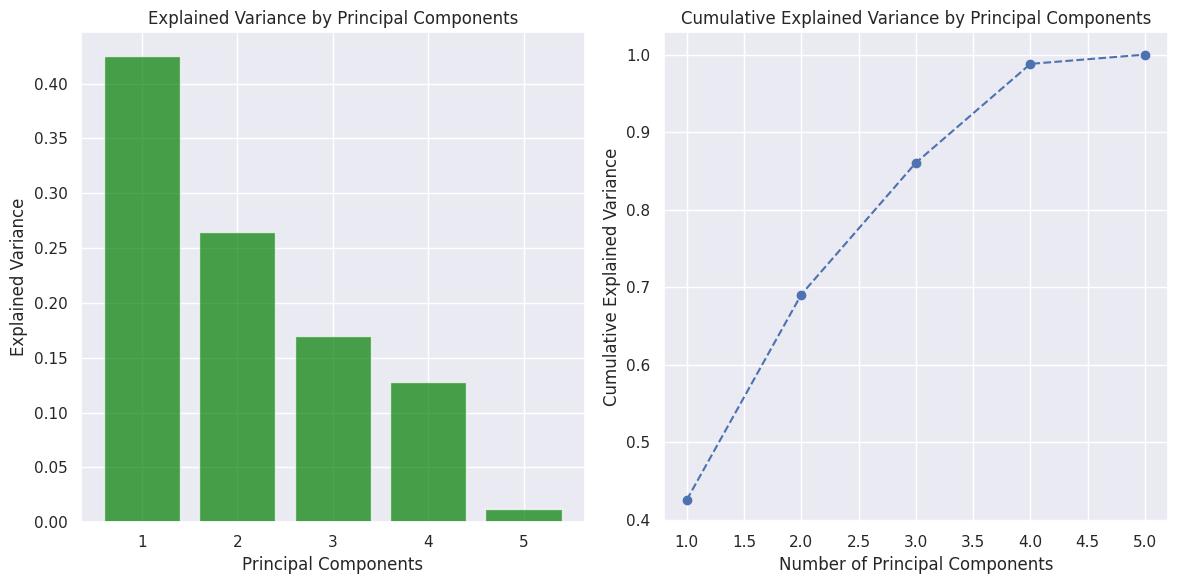

In [146]:
plot_variance(pca);

Here PC1 which is 'active_days' is highly informative, though the remaining components, despite their small variance, still have a significant relationship with status.

In [147]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC5    0.545057
PC1    0.385667
PC2    0.281333
PC3    0.272780
PC4    0.261469
Name: MI Scores, dtype: float64

All the principal components seem to capture similar trends related to the specified features, with PC5 showing a stronger emphasis on the "active_days" feature. The positive loadings indicate a positive correlation between the features and the respective principal components.